<a href="https://colab.research.google.com/github/mahenoor22/skin-disease-build/blob/main/model_build/VGG_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import ResNet50

# **CallBack**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.70):
            print("\nReached 70.0% accuracy so cancelling training!")
            self.model.stop_training = True

## **Import Dataset**

In [ ]:
!git clone https://github.com/mahenoor22/skin-disease-build.git

Cloning into 'skin-disease-build'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 28586 (delta 0), reused 4 (delta 0), pack-reused 28581
Receiving objects: 100% (28586/28586), 1.83 GiB | 36.92 MiB/s, done.
Resolving deltas: 100% (98/98), done.
Checking out files: 100% (29601/29601), done.


In [ ]:
train_dir = r"/content/skin-disease-build/dataset/train"
test_dir=r"/content/skin-disease-build/dataset/test"

In [ ]:
#HAM10000

train_dir = r"/content/skin-disease-build/datatree/train"
test_dir=r"/content/skin-disease-build/datatree/validation"

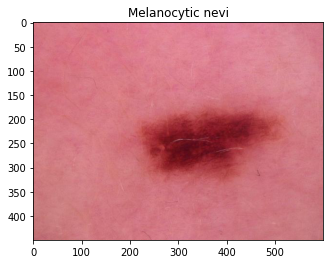

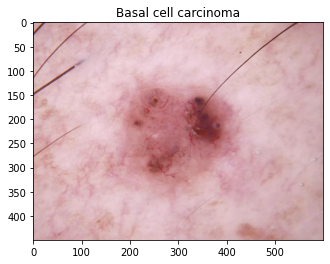

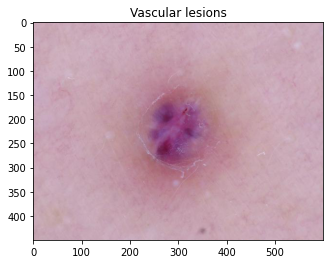

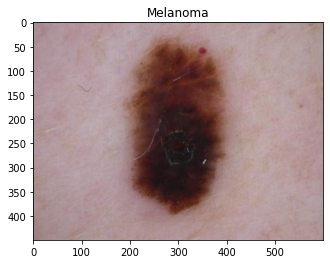

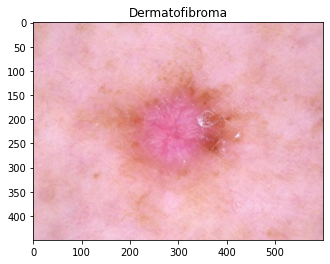

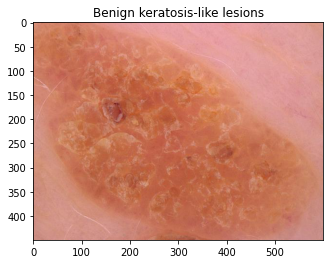

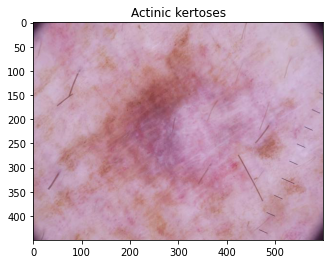

In [16]:
for i in os.listdir(train_dir):
    f_path = train_dir + "/" + i
    pics = os.listdir(f_path)
    d = random.choice(pics)
    img = mpimg.imread(f_path+"/"+d)
    plt.title(i)
    plt.imshow(img)
    plt.pause(10**(-10))

# **Image Generator**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False,
        validation_split=0.2)

train_gen = datagen.flow_from_directory(train_dir,
                                       batch_size=100,
                                       class_mode='categorical',
                                       target_size=(200,200),
                                       subset = 'training')
valid_gen = datagen.flow_from_directory(train_dir,
                                       batch_size=100,
                                       class_mode='categorical',
                                       target_size=(200,200),
                                       subset = 'validation')


Found 6402 images belonging to 7 classes.
Found 1598 images belonging to 7 classes.


In [ ]:
print(os.listdir(train_dir))


['Melanocytic nevi', 'Basal cell carcinoma', 'Vascular lesions', 'Melanoma', 'Dermatofibroma', 'Benign keratosis-like lesions', 'Actinic kertoses']


## Model

In [17]:
input_shape=(200,200,3)

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, 3, padding='same', activation='relu', input_shape=input_shape),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.55),
    Dense(7, activation='softmax')
])

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)       

In [ ]:
epochs = 50 
batch_size = 100
history = model.fit_generator(
    train_gen,
    steps_per_epoch=train_gen.n//batch_size,
    epochs=epochs,
    validation_data=valid_gen,
    validation_steps=valid_gen.n//batch_size,
    callbacks=[learning_rate_reduction])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
64/64 [==============================] - 1306s 20s/step - loss: 377.1770 - accuracy: 0.5099 - val_loss: 1.5654 - val_accuracy: 0.6747
Epoch 2/50
64/64 [==============================] - 1290s 20s/step - loss: 1.1166 - accuracy: 0.6655 - val_loss: 1.4309 - val_accuracy: 0.6760
Epoch 3/50
64/64 [==============================] - 1288s 20s/step - loss: 1.0630 - accuracy: 0.6760 - val_loss: 1.2589 - val_accuracy: 0.6720
Epoch 4/50
64/64 [==============================] - 1289s 20s/step - loss: 1.0437 - accuracy: 0.6714 - val_loss: 1.3163 - val_accuracy: 0.6700
Epoch 5/50
64/64 [==============================] - 1284s 20s/step - loss: 1.0270 - accuracy: 0.6713 - val_loss: 1.3334 - val_accuracy: 0.6700

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/50
64/64 [==============================] - 1287s 20s/step - loss: 0.9938 - accuracy: 0.6747 - val_loss: 1.3088 - val_accuracy: 0.6720
Epoch 7/50
64/64 [==============================] - 1292s 2

## **GRAPH**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()